In [1]:
import pandas as pd
import json

In [2]:
import tensorflow as tf
import keras
config = tf.ConfigProto(device_count = {'GPU': 8, 'CPU':32}) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [3]:
import requests

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
url = '/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT.json'

In [6]:
def get_ann(url):
    with open(url) as jfile:
        j = json.load(jfile)
        ann_df = pd.DataFrame(j['annotations'])
        img_df = pd.DataFrame(j['images'])
        cat_df = pd.DataFrame(j['categories'])    
    imgdata = pd.DataFrame.merge(ann_df, img_df, how='inner', left_on='image_id', right_on='id')
    img_label_data = pd.DataFrame.merge(imgdata, cat_df, how = 'inner', left_on = 'category_id', right_on = 'id')
    return img_label_data, img_df

In [7]:
z, _ = get_ann(url)

In [8]:
z['name'].value_counts()

empty            131457
opossum           14106
raccoon            8623
coyote             7209
rabbit             6938
deer               6102
bobcat             5975
cat                4759
squirrel           3398
dog                3035
rodent             2210
skunk              1361
fox                1093
mountain_lion        33
Name: name, dtype: int64

In [9]:
url_2 = '/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT_images'

In [10]:
# for images in z['image_id']:
#     img=mpimg.imread(url_2 + "/" + images + ".jpg")

In [11]:
# img = mpimg.imread('/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT_images/58c7f128-23d2-11e8-a6a3-ec086b02610b.jpg') 



In [12]:
# imgplot = plt.imshow(img)

In [13]:
url_idaho = '/data/animals/iWildCam_2019_iNat_Idaho/iWildCam_2019_iNat_Idaho.json'

In [14]:
def get_idaho(url):
    with open(url) as jfile:
        j = json.load(jfile)
        ann_df_idaho = pd.DataFrame(j['annotations'])
        img_df_idaho = pd.DataFrame(j['images'])
        cat_df_idaho = pd.DataFrame(j['categories'])    
    imgdata_idaho = pd.DataFrame.merge(ann_df_idaho, img_df_idaho, how='inner', left_on='image_id', right_on='id')
    img_file_data_idaho = pd.DataFrame.merge(imgdata_idaho, cat_df_idaho, how='inner', left_on='category_id', right_on='id')
    return img_file_data_idaho

In [15]:
idaho = get_idaho(url_idaho)

In [16]:
idaho['name'].value_counts()

deer             5097
squirrel         4713
small_mammal     3411
raccoon          2540
coyote           2281
rabbit           2010
bobcat           1238
fox              1188
black_bear        905
skunk             716
prongs            429
bison             314
bighorn_sheep     254
cat               195
mountain_lion     146
mountain_goat     144
rodent             64
wolf               37
moose              22
elk                 9
Name: name, dtype: int64

In [17]:
idaho.head()


,category_id,id_x,image_id,inat_species,file_name,height,id_y,inat_year,license,rights_holder,width,id,inat_species_list,name
0,3,1,1,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/6e...,532,1,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
1,3,2,2,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/dc...,533,2,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
2,3,3,3,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/f9...,532,3,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
3,3,4,4,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/4b...,564,4,2017,3,edd goodson,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
4,3,4,4,Marmota flaviventris,train_val2018/Mammalia/4219/60c8365f55c2f4e790...,533,4,2018,1,J. N. Stuart,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel


In [18]:
idaho['inat_species'].value_counts()

Odocoileus virginianus         3227
Sciurus niger                  2973
Procyon lotor                  2540
Canis latrans                  2281
Odocoileus hemionus            1870
Lynx rufus                     1238
Sylvilagus floridanus          1213
Vulpes vulpes                  1188
Castor canadensis              1164
Tamiasciurus hudsonicus         951
Ursus americanus                905
Mephitis mephitis               716
Lepus californicus              670
Lontra canadensis               523
Erethizon dorsatum              512
Antilocapra americana           429
Ochotona princeps               425
Ondatra zibethicus              392
Callospermophilus lateralis     391
Marmota flaviventris            349
Bison bison                     314
Ovis canadensis                 254
Neovison vison                  247
Felis catus                     195
Puma concolor                   146
Oreamnos americanus             144
Lepus americanus                107
Taxidea taxus               

In [19]:
idaho.head()

,category_id,id_x,image_id,inat_species,file_name,height,id_y,inat_year,license,rights_holder,width,id,inat_species_list,name
0,3,1,1,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/6e...,532,1,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
1,3,2,2,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/dc...,533,2,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
2,3,3,3,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/f9...,532,3,2017,3,R.J. Adams,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
3,3,4,4,Marmota flaviventris,train_val2017/Mammalia/Marmota flaviventris/4b...,564,4,2017,3,edd goodson,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel
4,3,4,4,Marmota flaviventris,train_val2018/Mammalia/4219/60c8365f55c2f4e790...,533,4,2018,1,J. N. Stuart,800,3,"[Urocitellus brunneus, Neotamias ruficaudus, U...",squirrel


In [20]:
idaho_updated = idaho.drop(['id_x', 'image_id', 'inat_species', 'height', 'id_y', 'inat_year', 'license', 'rights_holder', 'width','id','inat_species_list'], axis=1)

In [21]:
idaho_updated.head

<bound method NDFrame.head of        category_id                                          file_name  \
0                3  train_val2017/Mammalia/Marmota flaviventris/6e...   
1                3  train_val2017/Mammalia/Marmota flaviventris/dc...   
2                3  train_val2017/Mammalia/Marmota flaviventris/f9...   
3                3  train_val2017/Mammalia/Marmota flaviventris/4b...   
4                3  train_val2018/Mammalia/4219/60c8365f55c2f4e790...   
5                3  train_val2017/Mammalia/Marmota flaviventris/ab...   
6                3  train_val2017/Mammalia/Marmota flaviventris/7a...   
7                3  train_val2017/Mammalia/Marmota flaviventris/ca...   
8                3  train_val2017/Mammalia/Marmota flaviventris/12...   
9                3  train_val2017/Mammalia/Marmota flaviventris/f6...   
10               3  train_val2017/Mammalia/Marmota flaviventris/19...   
11               3  train_val2017/Mammalia/Marmota flaviventris/15...   
12               3  t

In [22]:

cct_updated = z.drop(['id_x', 'image_id','date_captured', 'frame_num', 'height', 'id_y', 'location', 'rights_holder', 'width','seq_id','seq_num_frames','width', 'id'], axis=1)


In [23]:
cct_updated[cct_updated['category_id']==4]

,category_id,file_name,name
155899,4,595f7b9c-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155900,4,59eab924-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155901,4,5957c444-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155902,4,5a0e36da-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155903,4,59f944af-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155904,4,59595122-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155905,4,59ef8f13-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155906,4,5a2638b8-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155907,4,59e10459-23d2-11e8-a6a3-ec086b02610b.jpg,rodent
155908,4,594ced35-23d2-11e8-a6a3-ec086b02610b.jpg,rodent


In [24]:
print(cct_updated['category_id'].value_counts())
print(len(cct_updated))



0     131457
19     14106
13      8623
11      7209
8       6938
1       6102
16      5975
17      4759
3       3398
18      3035
4       2210
14      1361
10      1093
22        33
Name: category_id, dtype: int64
196299


In [25]:
cct_updated.head()

,category_id,file_name,name
0,19,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
1,19,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
2,19,5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
3,19,58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
4,19,58d15f82-23d2-11e8-a6a3-ec086b02610b.jpg,opossum


In [26]:
print(idaho_updated['category_id'].value_counts())
print(len(idaho_updated))


1     5097
3     4713
5     3411
13    2540
11    2281
8     2010
16    1238
10    1188
12     905
14     716
7      429
20     314
9      254
17     195
22     146
21     144
4       64
15      37
2       22
6        9
Name: category_id, dtype: int64
25713


In [27]:
# idaho_updated[idaho_updated['category_id']==4]

In [28]:
idaho_cct = pd.concat([cct_updated, idaho_updated])

In [29]:
len(idaho_cct)

222012

In [30]:
idaho_cct['name'].value_counts()

empty            131457
opossum           14106
deer              11199
raccoon           11163
coyote             9490
rabbit             8948
squirrel           8111
bobcat             7213
cat                4954
small_mammal       3411
dog                3035
fox                2281
rodent             2274
skunk              2077
black_bear          905
prongs              429
bison               314
bighorn_sheep       254
mountain_lion       179
mountain_goat       144
wolf                 37
moose                22
elk                   9
Name: name, dtype: int64

In [31]:
# print(idaho_cct['file_name'][])

In [32]:
idaho_cct['file_name'].value_counts()

596d6392-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
591e430f-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
587d4109-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
58ac0bde-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
5892b691-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
58ef6e02-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
587828b7-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
58c1c1f8-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
588c140f-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
59087f9d-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
58e282bf-23d2-11e8-a6a3-ec086b02610b.jpg                                             4
5914f066-23d2-11e8-a6a3-ec086b02610b.jpg   

In [33]:
idaho_cct[idaho_cct['file_name']=='58d16024-23d2-11e8-a6a3-ec086b02610b.jpg']

,category_id,file_name,name
153216,8,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,rabbit
153217,8,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,rabbit
183710,16,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,bobcat
183711,16,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,bobcat


In [34]:
# img_test = mpimg.imread('/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT_images/58d16024-23d2-11e8-a6a3-ec086b02610b.jpg') 

In [35]:
# plt.imshow(img_test)

In [36]:
cct_updated[cct_updated['file_name']=='58d16024-23d2-11e8-a6a3-ec086b02610b.jpg']

,category_id,file_name,name
153216,8,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,rabbit
153217,8,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,rabbit
183710,16,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,bobcat
183711,16,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,bobcat


In [37]:
z[z['file_name']=='58d16024-23d2-11e8-a6a3-ec086b02610b.jpg']

,category_id,id_x,image_id,date_captured,file_name,frame_num,height,id_y,location,rights_holder,seq_id,seq_num_frames,width,id,name
153216,8,2bbbeac2-cbf1-11e8-819c-970a9450cdbc,58d16024-23d2-11e8-a6a3-ec086b02610b,2011-08-15 17:23:30,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,2,1494,58d16024-23d2-11e8-a6a3-ec086b02610b,125,Justin Brown,6f15e575-5567-11e8-86cd-dca9047ef277,3,2048,8,rabbit
153217,8,2bbbeac2-cbf1-11e8-819c-970a9450cdbc,58d16024-23d2-11e8-a6a3-ec086b02610b,2011-08-15 17:23:30,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,2,1494,58d16024-23d2-11e8-a6a3-ec086b02610b,125,Justin Brown,6f15e575-5567-11e8-86cd-dca9047ef277,3,2048,8,rabbit
183710,16,2bbbe9d2-cbf1-11e8-819c-970a9450cdbc,58d16024-23d2-11e8-a6a3-ec086b02610b,2011-08-15 17:23:30,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,2,1494,58d16024-23d2-11e8-a6a3-ec086b02610b,125,Justin Brown,6f15e575-5567-11e8-86cd-dca9047ef277,3,2048,16,bobcat
183711,16,2bbbe9d2-cbf1-11e8-819c-970a9450cdbc,58d16024-23d2-11e8-a6a3-ec086b02610b,2011-08-15 17:23:30,58d16024-23d2-11e8-a6a3-ec086b02610b.jpg,2,1494,58d16024-23d2-11e8-a6a3-ec086b02610b,125,Justin Brown,6f15e575-5567-11e8-86cd-dca9047ef277,3,2048,16,bobcat


In [38]:
# weird_2[weird_2['file_name']=='.jpg']

In [39]:
weird_1, weird_2 = get_ann(url)

In [40]:
len(weird_2)

196157

In [41]:
len(weird_1)

196299

In [42]:
idaho_cct.head()

,category_id,file_name,name
0,19,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
1,19,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
2,19,5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
3,19,58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
4,19,58d15f82-23d2-11e8-a6a3-ec086b02610b.jpg,opossum


In [43]:
idaho_cct_updated = idaho_cct.drop_duplicates()

In [44]:
len(idaho_cct_updated)

221824

In [45]:
len(idaho_cct)

222012

In [46]:
idaho_cct_updated[idaho_cct_updated['file_name']=='train_val2017/Mammalia/Mephitis mephitis/faf0951a807717fd29db381679b00892.jpg']

,category_id,file_name,name
425,3,train_val2017/Mammalia/Mephitis mephitis/faf09...,squirrel
22706,14,train_val2017/Mammalia/Mephitis mephitis/faf09...,skunk


In [47]:
idaho_cct_updated.head()

,category_id,file_name,name
0,19,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
1,19,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
2,19,5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
3,19,58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
4,19,58d15f82-23d2-11e8-a6a3-ec086b02610b.jpg,opossum


In [48]:
idaho_updated.category_id.value_counts()

1     5097
3     4713
5     3411
13    2540
11    2281
8     2010
16    1238
10    1188
12     905
14     716
7      429
20     314
9      254
17     195
22     146
21     144
4       64
15      37
2       22
6        9
Name: category_id, dtype: int64

In [49]:
cct_updated.category_id.value_counts()

0     131457
19     14106
13      8623
11      7209
8       6938
1       6102
16      5975
17      4759
3       3398
18      3035
4       2210
14      1361
10      1093
22        33
Name: category_id, dtype: int64

In [50]:
import numpy as np

In [51]:
len(cct_updated)

196299

In [52]:
cct_updated.head()

,category_id,file_name,name
0,19,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
1,19,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
2,19,5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
3,19,58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg,opossum
4,19,58d15f82-23d2-11e8-a6a3-ec086b02610b.jpg,opossum


In [53]:
test = cct_updated.sample(frac=0.2, replace=False, random_state=1)

In [54]:
all_ = pd.concat([cct_updated, test])

In [55]:
train = all_.drop_duplicates(keep=False)

In [56]:
len(test)

39260

In [57]:
def is_date_spot(x):
    if x == 0:
        return [1,0]
    else:
        return [0,1]



In [58]:
train['label']=train['category_id'].apply(is_date_spot)
test['label']=test['category_id'].apply(is_date_spot)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
test.head()

,category_id,file_name,name,label
90922,0,59be3f8a-23d2-11e8-a6a3-ec086b02610b.jpg,empty,"[1, 0]"
161721,13,59cb3884-23d2-11e8-a6a3-ec086b02610b.jpg,raccoon,"[0, 1]"
176797,11,5a02fad1-23d2-11e8-a6a3-ec086b02610b.jpg,coyote,"[0, 1]"
131817,0,5914eef1-23d2-11e8-a6a3-ec086b02610b.jpg,empty,"[1, 0]"
70081,0,5998cdc8-23d2-11e8-a6a3-ec086b02610b.jpg,empty,"[1, 0]"


In [60]:
type(train['label'].iloc[0])

list

In [61]:
train['category_id'].value_counts()

0     105136
19     11258
13      6903
11      5787
8       5441
1       4969
16      4622
17      3796
3       2748
18      2418
4       1767
14      1075
10       862
22        31
Name: category_id, dtype: int64

In [62]:
test['category_id'].value_counts()

0     26321
19     2846
13     1720
11     1420
8      1396
16     1244
1      1133
17      963
3       646
18      617
4       435
14      286
10      231
22        2
Name: category_id, dtype: int64

In [63]:
category_train = train.drop(train[train['category_id']==0].index)

In [64]:
category_test = test.drop(test[test['category_id']==0].index)

In [65]:
from keras.utils import to_categorical
from numpy import array
from sklearn import preprocessing

In [66]:
# lst_c =[]
# for categories in category_train['name']:
#     lst_c.append(categories)

# le = preprocessing.LabelEncoder()
# le.fit(['opossum', 'raccoon', 'coyote', 'rabbit', 'deer', 'bobcat', 'cat', 'squirrel','dog', 'rodent','skunk', 'fox', 'mountain_lion'])

# lst_c_int = le.transform(lst_c)


# data = array(lst_c_int)
# # one hot encode
# encoded = to_categorical(data)

def to_one_hot(df):
    lst_c =[]
    for categories in df['name']:
        lst_c.append(categories)

    le = preprocessing.LabelEncoder()
    le.fit(['opossum', 'raccoon', 'coyote', 'rabbit', 'deer', 'bobcat', 'cat', 'squirrel','dog', 'rodent','skunk', 'fox', 'mountain_lion'])
    lst_c_int = le.transform(lst_c)


    data = array(lst_c_int)
# one hot encode
    encoded = to_categorical(data)
    return encoded
    


In [67]:
encoded_train = to_one_hot(category_train)
encoded_test = to_one_hot(category_test)

In [68]:
encoded_lst_train = list(encoded_train)
encoded_lst_test = list(encoded_test)

In [69]:
encoded_df_train = pd.DataFrame({'category_onehot':encoded_lst_train})
encoded_df_test = pd.DataFrame({'category_onehot':encoded_lst_test})

In [70]:
category_train.tail()

,category_id,file_name,name,label
196293,22,594e762e-23d2-11e8-a6a3-ec086b02610b.jpg,mountain_lion,"[0, 1]"
196294,22,59817a83-23d2-11e8-a6a3-ec086b02610b.jpg,mountain_lion,"[0, 1]"
196295,22,59830956-23d2-11e8-a6a3-ec086b02610b.jpg,mountain_lion,"[0, 1]"
196296,22,59ef8edc-23d2-11e8-a6a3-ec086b02610b.jpg,mountain_lion,"[0, 1]"
196298,22,594e784f-23d2-11e8-a6a3-ec086b02610b.jpg,mountain_lion,"[0, 1]"


In [71]:
category_train = category_train.reset_index(drop=True)
category_test = category_test.reset_index(drop=True)

In [72]:
category_train['category_onehot'] = encoded_df_train['category_onehot']
category_test['category_onehot'] = encoded_df_test['category_onehot']

In [73]:
category_train['category_onehot'] = category_train['category_onehot'].apply(lambda x : list(x))

In [74]:
category_test['category_onehot'] = category_test['category_onehot'].apply(lambda x : list(x))

In [75]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers


train_batchsize = 32
val_batchsize = 10
image_size = 128



In [76]:
# Load Resnet model 
model = VGG19(weights= None, include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers except the last 4 layers
# for layer in model.layers[:-4]:
# 	layer.trainable = False

# Check the trainable status of the individual layers
for layer in model.layers:
	print(layer, layer.trainable)

Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x7ff8581cfd68> False
<keras.layers.convolutional.Conv2D object at 0x7ff8581cfeb8> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9ca2080> True
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a9c75908> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9c75320> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9bf1278> True
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a9ba3978> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9ba3c18> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9b07898> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9ac3cf8> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9a8e8d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a9a69cf8> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9a69c50> True
<keras.layers.convolutional.Conv2D object at 0x7ff6a9a33b70> True
<

In [77]:
# Create the new model 
model_new = models.Sequential()

# Add the Resnet Conv to the base model 
model_new.add(model)

#  Add new layers
model_new.add(layers.Flatten())
model_new.add(layers.Dense(1024, activation= 'relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(1024, activation= 'relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(13, activation= 'softmax'))

# Show a summary of the model
print(model_new.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
___________________________

In [78]:
category_test.head()

,category_id,file_name,name,label,category_onehot
0,13,59cb3884-23d2-11e8-a6a3-ec086b02610b.jpg,raccoon,"[0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,11,5a02fad1-23d2-11e8-a6a3-ec086b02610b.jpg,coyote,"[0, 1]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,17,59c99c01-23d2-11e8-a6a3-ec086b02610b.jpg,cat,"[0, 1]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,16,585f4d01-23d2-11e8-a6a3-ec086b02610b.jpg,bobcat,"[0, 1]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,19,5a1fe6ad-23d2-11e8-a6a3-ec086b02610b.jpg,opossum,"[0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [79]:
type(category_train['category_onehot'].iloc[0])

list

In [80]:
train_datagen = ImageDataGenerator(	rescale= 1./255,
									rotation_range = 20,
									width_shift_range = 0.2,
									height_shift_range = 0.2,
									horizontal_flip = True,
									fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale= 1./255)


train_generator = train_datagen.flow_from_dataframe(dataframe=category_train,
                                                    directory= "/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT_images/",
													x_col="file_name",
                                                    y_col = "name",
                                                    target_size=(image_size, image_size),
													batch_size= train_batchsize,
													class_mode= 'categorical')

validation_generator = validation_datagen.flow_from_dataframe(dataframe=category_test,
                                                              directory="/data/animals/iWildCam_2019_CCT/iWildCam_2019_CCT_images/",
                                                              x_col="file_name",
                                                                y_col = "name",
																target_size = (image_size, image_size),
																batch_size = val_batchsize,
																class_mode = 'categorical',
																shuffle= False)


Found 51677 images belonging to 13 classes.
Found 12925 images belonging to 13 classes.


In [81]:
category_train['name'].value_counts()

opossum          11258
raccoon           6903
coyote            5787
rabbit            5441
deer              4969
bobcat            4622
cat               3796
squirrel          2748
dog               2418
rodent            1767
skunk             1075
fox                862
mountain_lion       31
Name: name, dtype: int64

In [82]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13455467773984585857
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5474217680143129697
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7688638689677030311
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11017082437037719949
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:3"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16480834188671461887
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4078242799705332501
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type

In [83]:
!nvidia-smi -l 3

Tue Apr 16 02:10:55 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      9%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:11:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    39W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:11:20 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:11:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:11:45 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:11:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:12:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:12:22 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   35C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:12:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:12:47 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    40W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:12:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

Tue Apr 16 02:13:11 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M60           On   | 00000000:00:1B.0 Off |                    0 |
| N/A   34C    P0    38W / 150W |   7321MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla M60           On   | 00000000:00:1C.0 Off |                    0 |
| N/A   44C    P0    39W / 150W |     83MiB /  7618MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [84]:
config = tf.ConfigProto()
config.gpu_options.allocator_type ='BFC'
config.gpu_options.per_process_gpu_memory_fraction = 0.9

In [85]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [86]:

#Compile the model 
model_new.compile(loss= 'categorical_crossentropy', 
					optimizer = optimizers.RMSprop(lr=1e-4),
					metrics= ['acc'])

#Train the model 
history = model_new.fit_generator(train_generator,
								steps_per_epoch= train_generator.samples/train_generator.batch_size,
								epochs= 20,
								shuffle= True,
								validation_data= validation_generator,
								validation_steps= validation_generator.samples/validation_generator.batch_size,
								verbose= 1)



#saving the model
model_new.save('resnet50_model.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1615/1614 [==============================] - 3133s 2s/step - loss: 1.9659 - acc: 0.3135 - val_loss: 1.7679 - val_acc: 0.3648
Epoch 2/20
1615/1614 [==============================] - 2962s 2s/step - loss: 1.7009 - acc: 0.4016 - val_loss: 1.5511 - val_acc: 0.4470
Epoch 3/20
1615/1614 [==============================] - 2938s 2s/step - loss: 1.5735 - acc: 0.4462 - val_loss: 1.5020 - val_acc: 0.4528
Epoch 4/20
1615/1614 [==============================] - 2948s 2s/step - loss: 1.4676 - acc: 0.4894 - val_loss: 1.3669 - val_acc: 0.5159
Epoch 5/20
1615/1614 [==============================] - 2955s 2s/step - loss: 1.3982 - acc: 0.5185 - val_loss: 1.3875 - val_acc: 0.5109
Epoch 6/20
1615/1614 [==============================] - 2937s 2s/step - loss: 1.3601 - acc: 0.5340 - val_loss: 1.3570 - val_acc: 0.5408
Epoch 7/20
1615/1614 [==============================] - 2961s 2s/step - loss: 1.3621 - acc: 0.5353 - val_loss: 1.3307 - val_acc: 0.5347


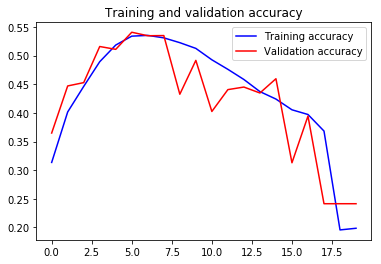

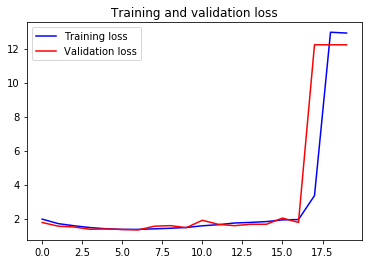

In [87]:
def plot_training(history):
	acc= history.history['acc']
	val_acc = history.history['val_acc']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs = range(len(acc))

	plt.plot(epochs, acc, 'b', label='Training accuracy')
	plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
	plt.title('Training and validation accuracy')
	plt.legend()

	plt.figure()

	plt.plot(epochs, loss, 'b', label='Training loss')
	plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
	plt.title('Training and validation loss')
	plt.legend()

	plt.show()




# plot training history
plot_training(history)